<a href="https://colab.research.google.com/github/RafsanJany-44/Thesis_Project/blob/main/ANN_TEST3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Loading Dataset
data = pd.read_csv("/content/drive/MyDrive/Thesis_Data/EEG_HMC_underscore.csv")

In [6]:
X = data.iloc[:, 1:76].values
Y = data.iloc[:, 0].values

In [7]:
#Encoding Categorical the sleep_stage
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
Y = np.array(LE1.fit_transform(Y))

In [8]:
#Encoding Categorical variable Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [9]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [10]:
len(X_train)

86760

In [11]:
len(X_test)

21691

In [12]:
X_train.shape


(86760, 215)

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(215,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=300)

Epoch 1/300
2712/2712 [==============================] - 10s 3ms/step - loss: 1.7528 - accuracy: 0.4153
Epoch 2/300
2712/2712 [==============================] - 7s 2ms/step - loss: 1.2361 - accuracy: 0.5169
Epoch 3/300
2712/2712 [==============================] - 5s 2ms/step - loss: 1.1798 - accuracy: 0.5387
Epoch 4/300
2712/2712 [==============================] - 5s 2ms/step - loss: 1.1541 - accuracy: 0.5517
Epoch 5/300
2712/2712 [==============================] - 6s 2ms/step - loss: 1.1358 - accuracy: 0.5602
Epoch 6/300
2712/2712 [==============================] - 5s 2ms/step - loss: 1.1257 - accuracy: 0.5645
Epoch 7/300
2712/2712 [==============================] - 6s 2ms/step - loss: 1.1194 - accuracy: 0.5678
Epoch 8/300
2712/2712 [==============================] - 6s 2ms/step - loss: 1.1213 - accuracy: 0.5677
Epoch 9/300
2712/2712 [==============================] - 5s 2ms/step - loss: 1.1071 - accuracy: 0.5726
Epoch 10/300
2712/2712 [==============================] - 6s 2ms/step - 

In [14]:
model.evaluate(X_test, y_test)

678/678 [==============================] - 2s 2ms/step - loss: 0.9910 - accuracy: 0.6235


[0.9909839034080505, 0.6234843730926514]

#---------------------------------------------------------------
________________________________________________________________

<h2>Improve NN with scaling the features</h2>

In [15]:
X_train = X_train / 255
X_test = X_test / 255
X_train[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.92156863e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

<h3>Now we try to draw the Confusion matrix</h3>
<p>Here, the NN will predict the test data considering each of the neurons. So, we need to find out the best neuron which is giving us the highest prediction.
    <br> In this case we have to use the argmax() function for those neurons. </p>

In [17]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

**Now we need to draw the confusion matrix to show where our model is doing mistakes**
<br>
<br>
***Tensorflow has its own confusion matrix function where "labels" is the truth data and "predictions" is the predicted data***

In [18]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[   0,    0, 2368,    0,    0],
       [   0,    0, 7891,    0,    0],
       [   0,    0, 4254,    0,    0],
       [   0,    0, 3374,    0,    0],
       [   0,    0, 3804,    0,    0]], dtype=int32)>

Text(69.0, 0.5, 'Truth')

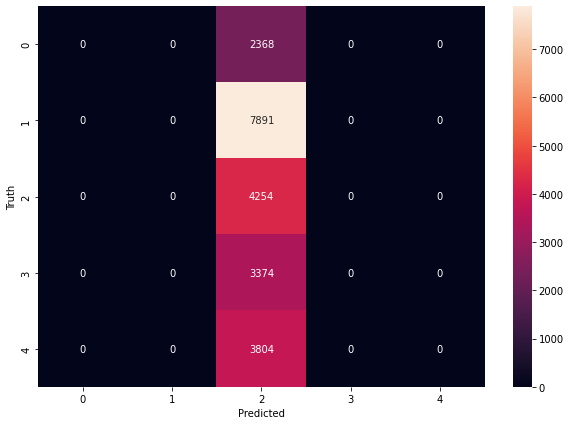

In [19]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d') # here, cm is called to be visualized
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3>Add hidden layers in the NN to improve the accuracy</h3>
<p>What we will do here: <br>
    1. The first layer includes the input layer and hidden layer. The number of neurons in the hidden layer is fixed based on some trail and error <br>
    2. The last layer includes the output layer<br>
    3. layers are comma (,) separated
    
<b>Note: When the NN adds hidden layer, it will take more time to be trained</b>

</p>

In [22]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(215,), activation='relu'), # input layer
    keras.layers.Dense(10, activation='sigmoid') # output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
2712/2712 [==============================] - 8s 3ms/step - loss: 1.4360 - accuracy: 0.4036
Epoch 2/5
2712/2712 [==============================] - 5s 2ms/step - loss: 1.2070 - accuracy: 0.5086
Epoch 3/5
2712/2712 [==============================] - 7s 2ms/step - loss: 1.1187 - accuracy: 0.5530
Epoch 4/5
2712/2712 [==============================] - 7s 3ms/step - loss: 1.0746 - accuracy: 0.5731
Epoch 5/5
2712/2712 [==============================] - 6s 2ms/step - loss: 1.0458 - accuracy: 0.5855


In [24]:
model.fit(X_train, y_train, epochs=300)

Epoch 1/300
2712/2712 [==============================] - 7s 3ms/step - loss: 0.8921 - accuracy: 0.6476
Epoch 2/300
2712/2712 [==============================] - 11s 4ms/step - loss: 0.8870 - accuracy: 0.6503
Epoch 3/300
2712/2712 [==============================] - 14s 5ms/step - loss: 0.8822 - accuracy: 0.6509
Epoch 4/300
2712/2712 [==============================] - 12s 5ms/step - loss: 0.8783 - accuracy: 0.6539
Epoch 5/300
2712/2712 [==============================] - 7s 3ms/step - loss: 0.8747 - accuracy: 0.6555
Epoch 6/300
2712/2712 [==============================] - 6s 2ms/step - loss: 0.8707 - accuracy: 0.6553
Epoch 7/300
2712/2712 [==============================] - 6s 2ms/step - loss: 0.8674 - accuracy: 0.6584
Epoch 8/300
2712/2712 [==============================] - 7s 3ms/step - loss: 0.8634 - accuracy: 0.6595
Epoch 9/300
2712/2712 [==============================] - 7s 3ms/step - loss: 0.8600 - accuracy: 0.6610
Epoch 10/300
2712/2712 [==============================] - 6s 2ms/step 

In [25]:
model.evaluate(X_test, y_test)

678/678 [==============================] - 2s 2ms/step - loss: 0.7177 - accuracy: 0.7202


[0.7177338004112244, 0.7201604247093201]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3>Using Flatten layer so that we don't have to call .reshape function on input dataset</h3>

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input layer is reshaped and flattened
    keras.layers.Dense(100, activation='relu'), # input layer
    keras.layers.Dense(10, activation='sigmoid') # output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 733us/step - loss: 0.2730 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 1s 727us/step - loss: 0.1240 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 1s 727us/step - loss: 0.0858 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 1s 726us/step - loss: 0.0655 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 1s 777us/step - loss: 0.0517 - accuracy: 0.9837


Text(69.0, 0.5, 'Truth')

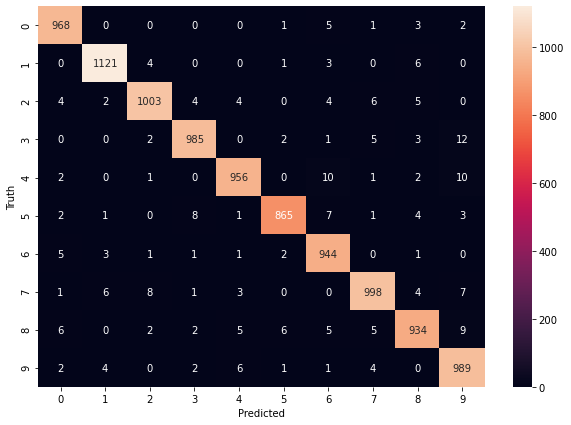

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 626us/step - loss: 0.0776 - accuracy: 0.9763


[0.07760973274707794, 0.9763000011444092]